# Test Performance

This test book is to test the performance of the model.

In [1]:
import os
import rdkit
import csv
import shutil
import json
import time

import numpy as np
import rdkit
import pandas as pd

from utils import visualize_random_output_molecules, read_molecule, molecule_from_smiles_img

try: ipynb_path
except NameError: ipynb_path = os.getcwd()

root = os.path.abspath(os.path.join(ipynb_path, '..'))
notebook = os.path.join(root, 'notebook')


input_dir = os.path.join(notebook, 'input', 'perf-test')
input_file_name = os.listdir(input_dir)
output_dir = os.path.join(notebook, 'output', 'perf-test')

Input: acetophenone.smi (1/10)


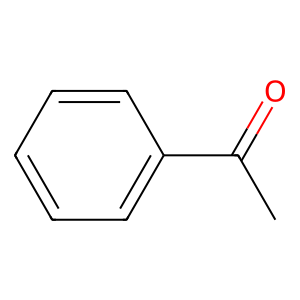

Starting sampling at 2024-03-03 19:31:55
Total input smiles: 1
Time taken in seconds: 19
Removing CC(=O)c1ccccc1, as it is a duplicate entry.
Total unique smiles generated: 99, Expected: 100, Loss: 1


Input: aspirin.smi (2/10)


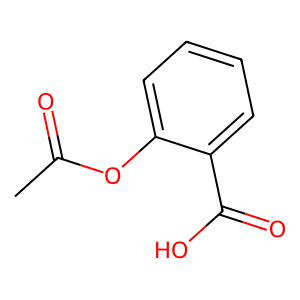

Starting sampling at 2024-03-03 19:32:19
Total input smiles: 1
Time taken in seconds: 22
Removing CC(=O)Oc1ccccc1C(=O)O, as it is a duplicate entry.
Total unique smiles generated: 98, Expected: 100, Loss: 2


Input: clopidogrel.smi (3/10)


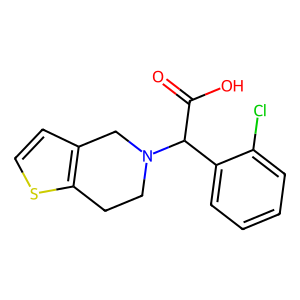

Starting sampling at 2024-03-03 19:32:46
Total input smiles: 1
Time taken in seconds: 46
Removing O=C(O)C(c1ccccc1Cl)N1CCc2sccc2C1, as it is a duplicate entry.
Total unique smiles generated: 99, Expected: 100, Loss: 1


Input: elastoper.smi (4/10)


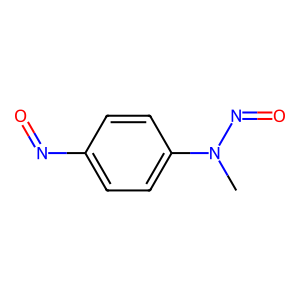

Starting sampling at 2024-03-03 19:33:36

Input: ibuprofen.smi (5/10)

Total input smiles: 1
Time taken in seconds: 57
Total unique smiles generated: 100, Expected: 100, Loss: 0


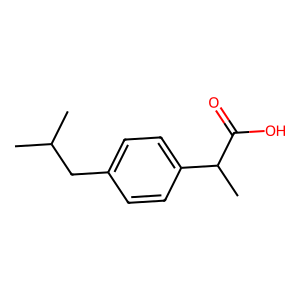

Starting sampling at 2024-03-03 19:34:39
Total input smiles: 1
Time taken in seconds: 24
Removing CC(C)Cc1ccc(C(C)C(=O)O)cc1, as it is a duplicate entry.
Total unique smiles generated: 98, Expected: 100, Loss: 2


Input: lipoyllysine.smi (6/10)


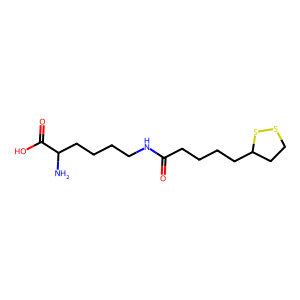

Starting sampling at 2024-03-03 19:35:08
Total input smiles: 1
Time taken in seconds: 63
Total unique smiles generated: 99, Expected: 100, Loss: 1


Input: mehp.smi (7/10)


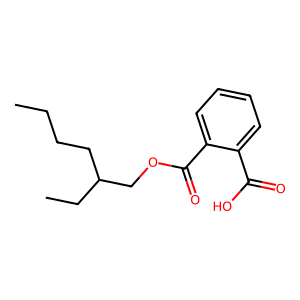

Starting sampling at 2024-03-03 19:36:16
Total input smiles: 1
Time taken in seconds: 24
Total unique smiles generated: 100, Expected: 100, Loss: 0


Input: paracetamol.smi (8/10)


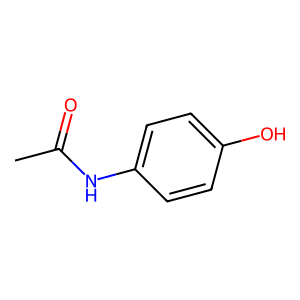

Starting sampling at 2024-03-03 19:36:44
Total input smiles: 1
Time taken in seconds: 23
Total unique smiles generated: 99, Expected: 100, Loss: 1


Input: quintozene.smi (9/10)


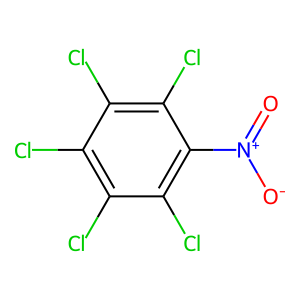

Starting sampling at 2024-03-03 19:37:12
Total input smiles: 1
Time taken in seconds: 32
Removing O=[N+]([O-])c1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl, as it is a duplicate entry.
Total unique smiles generated: 89, Expected: 100, Loss: 11


Input: trifluralin.smi (10/10)


[19:37:45] non-ring atom 13 marked aromatic
[19:37:45] non-ring atom 13 marked aromatic
[19:37:45] non-ring atom 13 marked aromatic


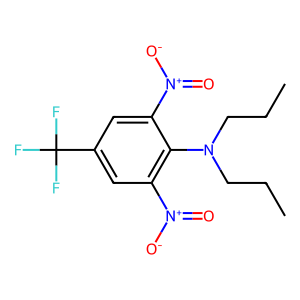

In [ ]:
if os.path.exists(output_dir):
   shutil.rmtree(output_dir)
os.makedirs(output_dir)

total_input_files = len(input_file_name)

for idx, smile in enumerate(input_file_name):
    input_smile = os.path.join(input_dir, smile)
    output_smile = os.path.join(output_dir, smile)

    print(f"Input: {smile} ({idx + 1}/{total_input_files})")
    display(molecule_from_smiles_img(read_molecule(input_smile)))
    !python {root}/model/framework/code/main.py {input_smile} {output_smile} True
    print("\n")
    

In [3]:
# Display all logs

logs = list(filter(lambda name: name.endswith("smi.json"), os.listdir(output_dir)))

name = []
img = []
start = []
end = []
time_taken = []
total = []
expected = []
loss = []

for file in logs:
    log_file = os.path.join(output_dir, file)
    input_smi = os.path.join(input_dir, file.replace(".json", ""))

    with open(log_file) as fp:
        dict = json.load(fp)
        name.append(file.replace(".json", ""))
        start_time = dict['start']
        end_time = dict['end']
        start.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time)))
        end.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time)))
        time_taken.append(end_time - start_time)
        total.append(dict['total'])
        expected.append(dict['expected'])
        loss.append(dict['expected'] - dict['total'])


avg = lambda a: sum(a) / len(a)

name.append("-")
start.append("-")
end.append("Average")
time_taken.append(avg(time_taken))
total.append(avg(total))
expected.append("-")
loss.append(avg(loss))


data = {
    "Name": name,
    "Start": start,
    "End": end,
    "Time Taken (in seconds)": time_taken,
    "Total smiles generated (Unique)": total,
    "Expected (batch_size * num of smiles)": expected,
    "loss": loss,
}


# Append the mean values to the DataFrame
df = pd.DataFrame(data)
df

,Name,Start,End,Time Taken (in seconds),Total smiles generated (Unique),Expected (batch_size * num of smiles),loss
0,acetophenone.smi,2024-03-03 16:35:57,2024-03-03 16:36:13,16.156425,99.0,100,1.0
1,aspirin.smi,2024-03-03 16:36:17,2024-03-03 16:36:35,18.678564,98.0,100,2.0
2,clopidogrel.smi,2024-03-03 16:36:39,2024-03-03 16:37:17,37.930449,99.0,100,1.0
3,elastoper.smi,2024-03-03 16:37:20,2024-03-03 16:38:08,47.277414,100.0,100,0.0
4,ibuprofen.smi,2024-03-03 16:38:12,2024-03-03 16:38:31,19.716971,98.0,100,2.0
5,lipoyllysine.smi,2024-03-03 16:38:35,2024-03-03 16:39:27,51.463006,99.0,100,1.0
6,mehp.smi,2024-03-03 16:39:30,2024-03-03 16:39:50,19.334455,100.0,100,0.0
7,paracetamol.smi,2024-03-03 16:39:53,2024-03-03 16:40:12,18.580844,99.0,100,1.0
8,quintozene.smi,2024-03-03 16:40:16,2024-03-03 16:40:43,27.597384,89.0,100,11.0
9,trifluralin.smi,2024-03-03 16:40:47,2024-03-03 16:41:26,38.806583,97.0,100,3.0


acetophenone.smi


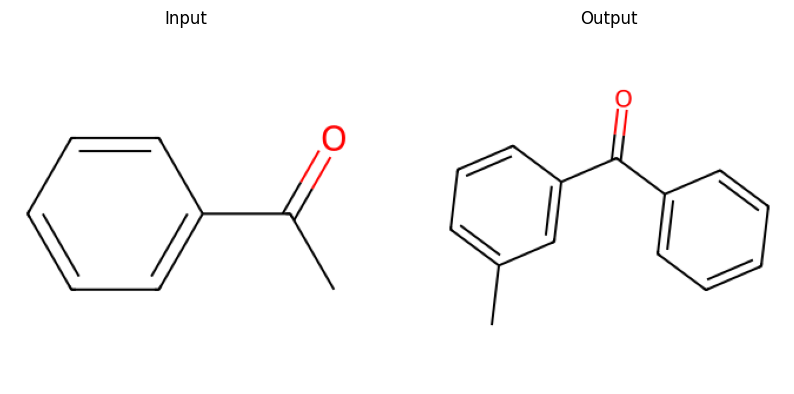

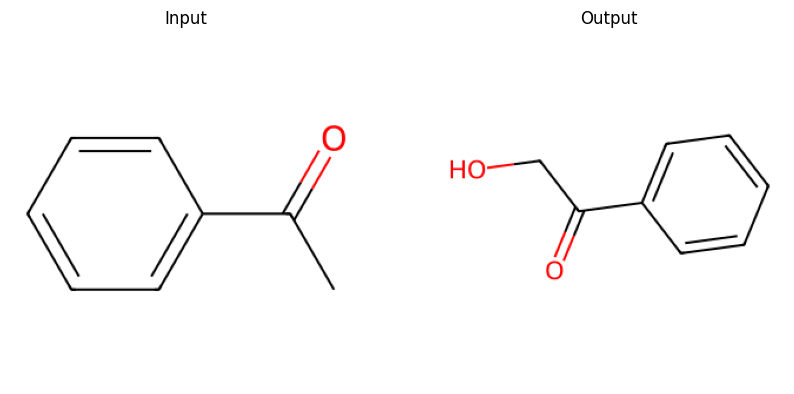

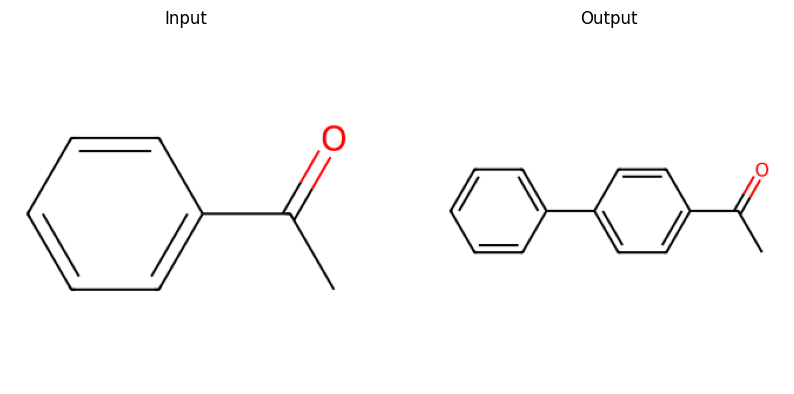

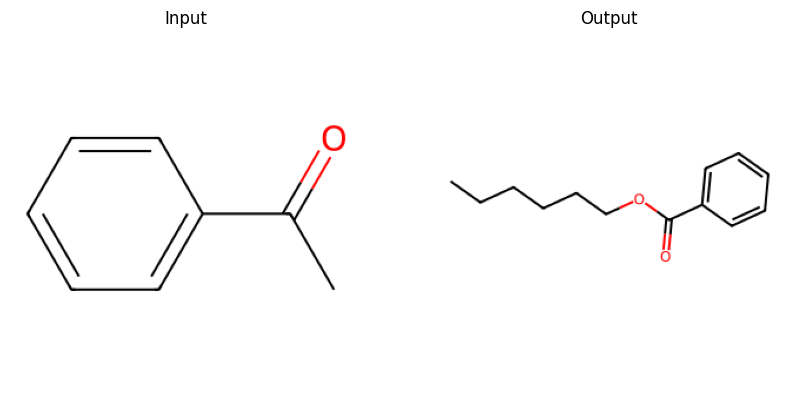

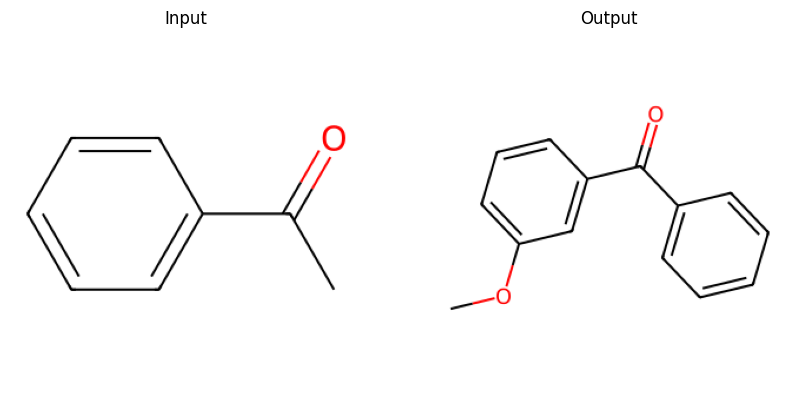

aspirin.smi


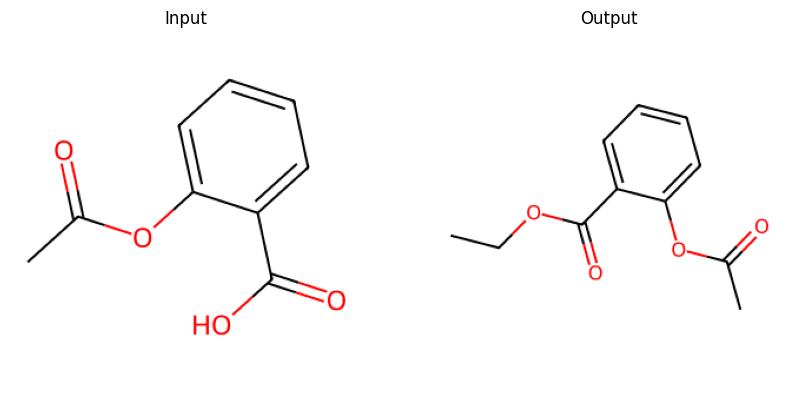

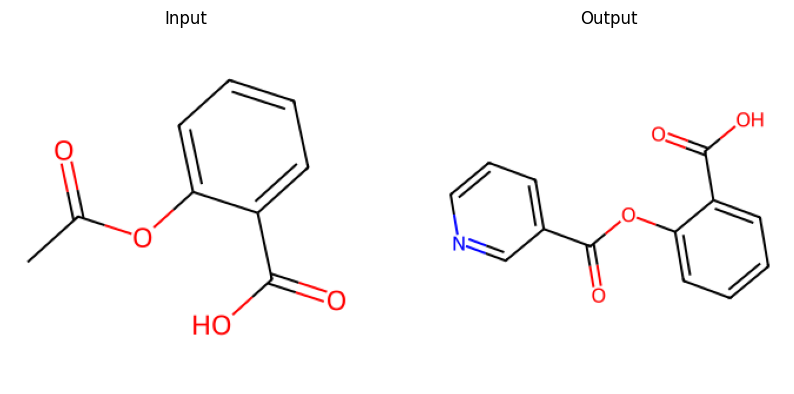

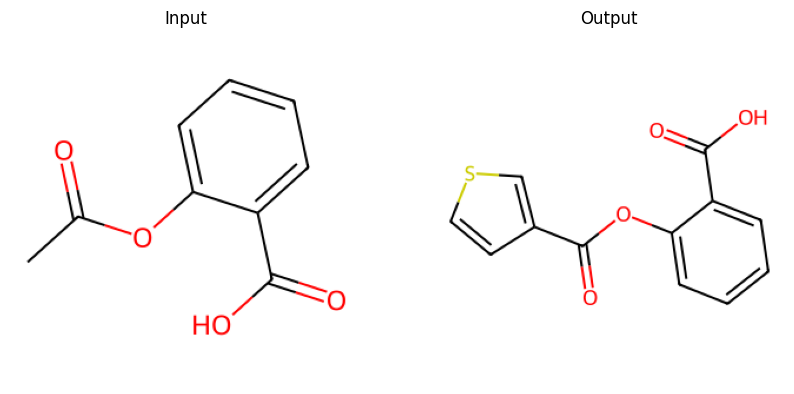

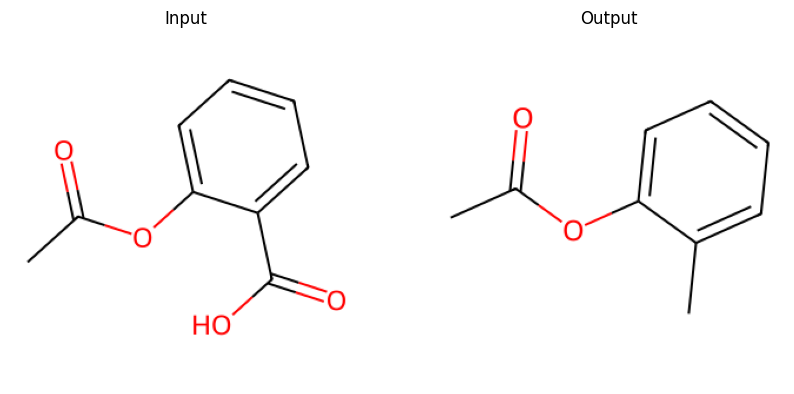

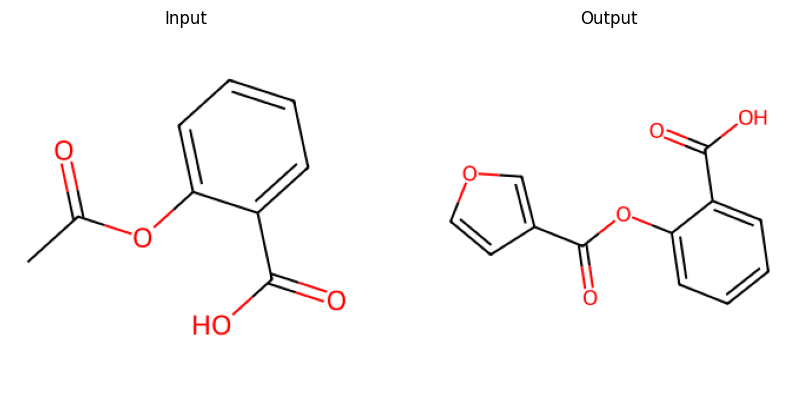

clopidogrel.smi


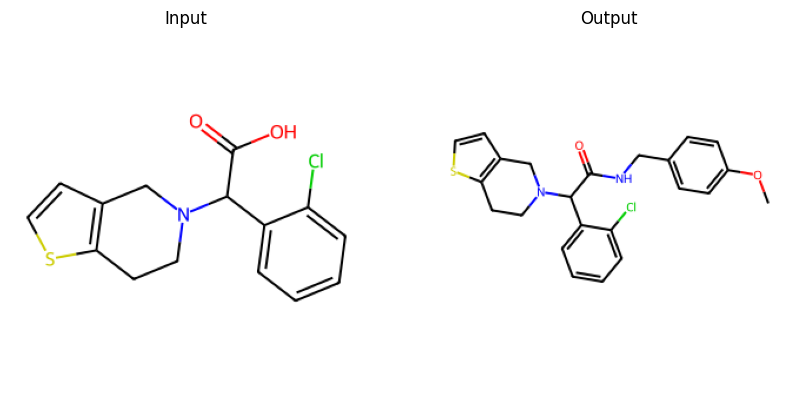

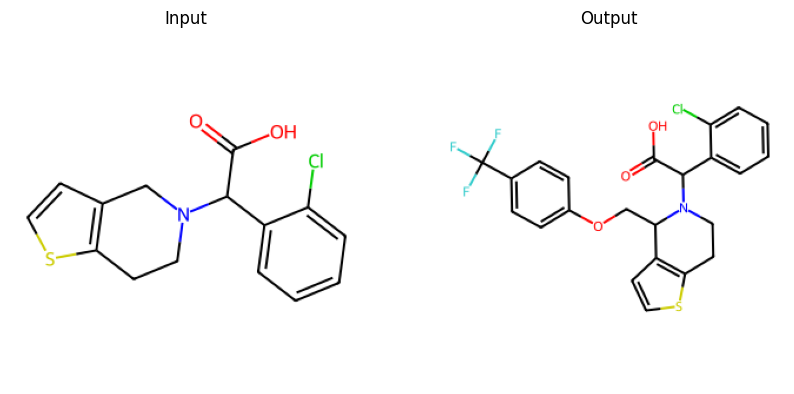

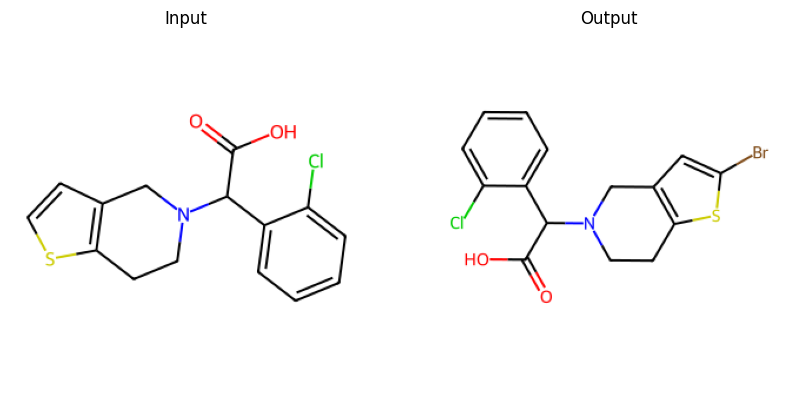

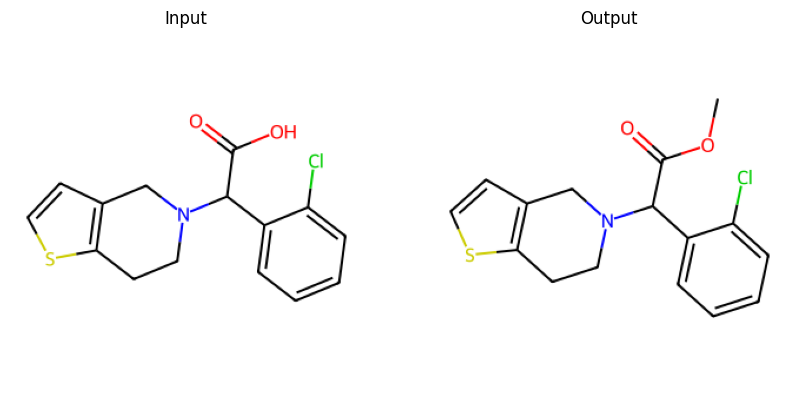

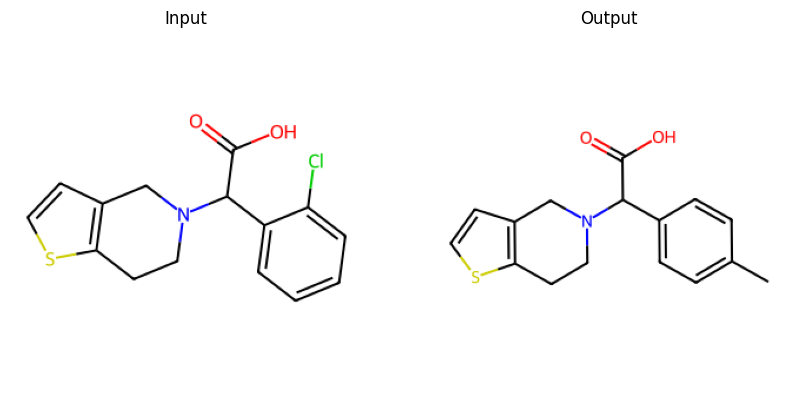

elastoper.smi


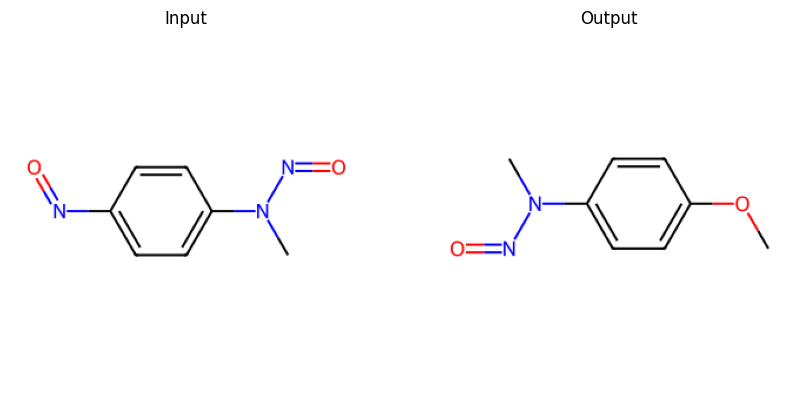

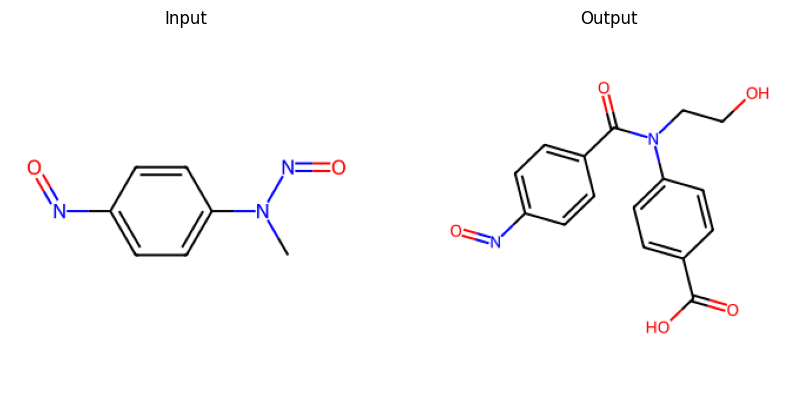

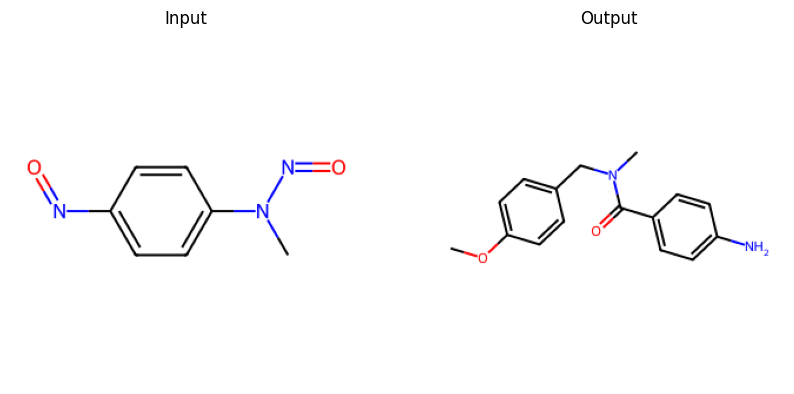

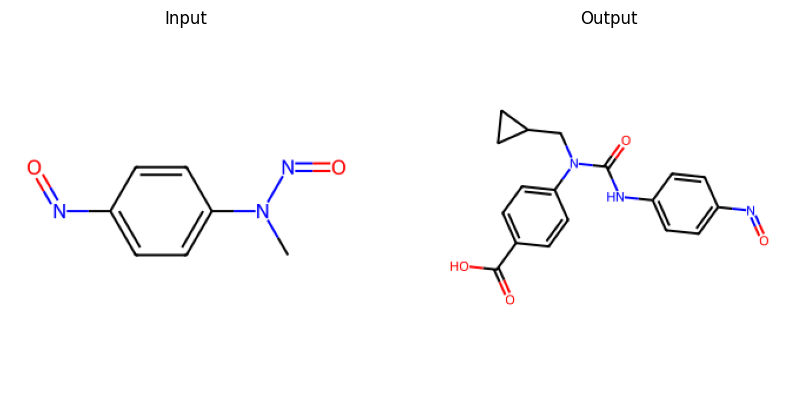

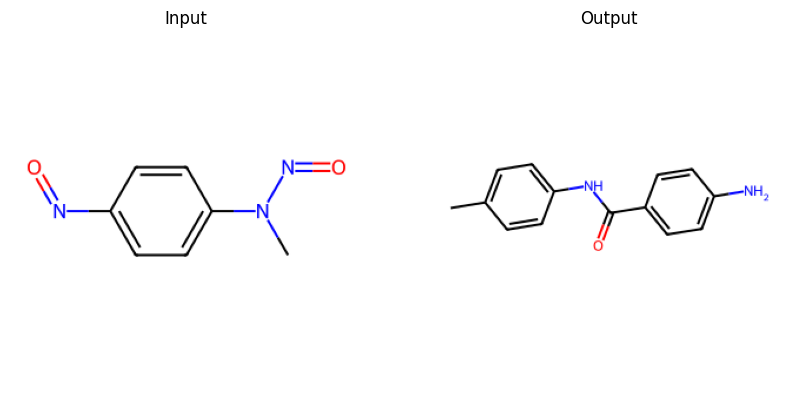

ibuprofen.smi


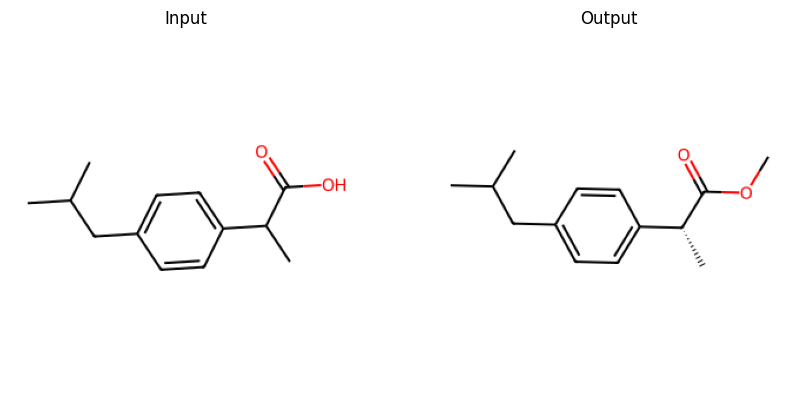

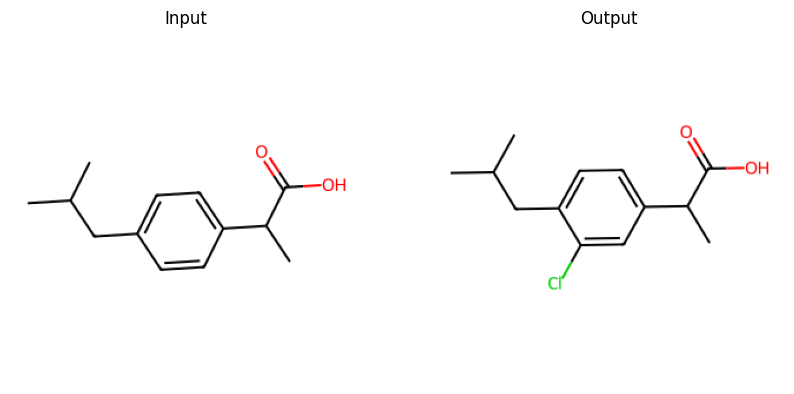

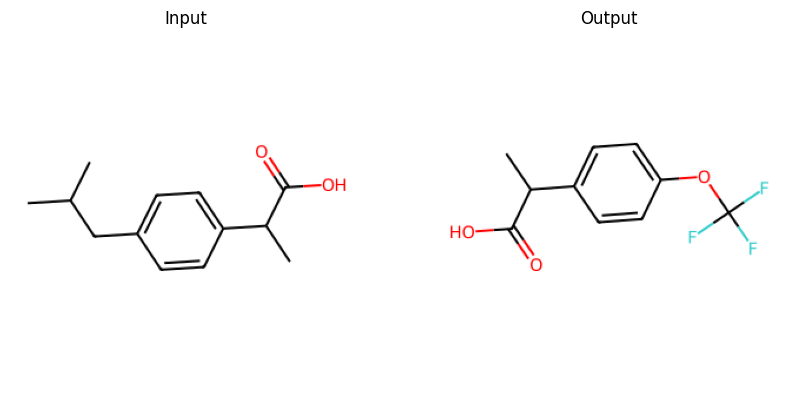

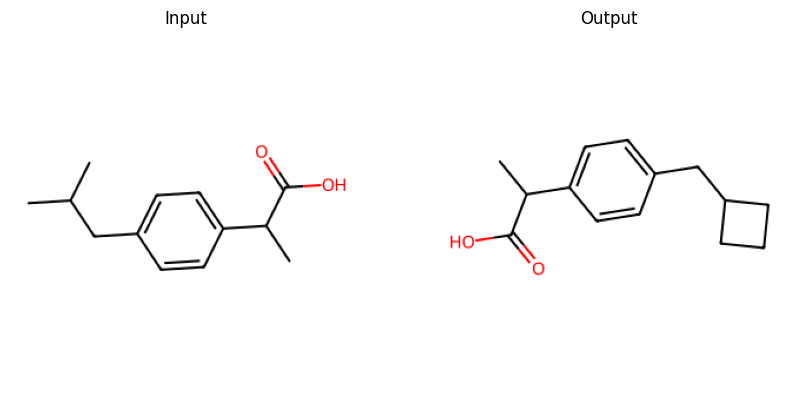

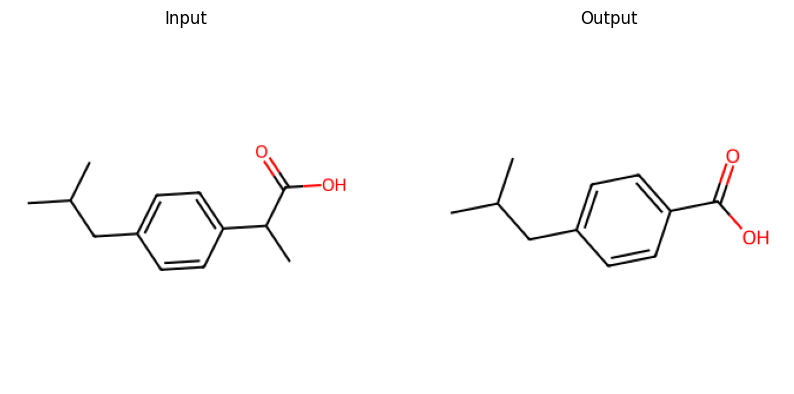

lipoyllysine.smi


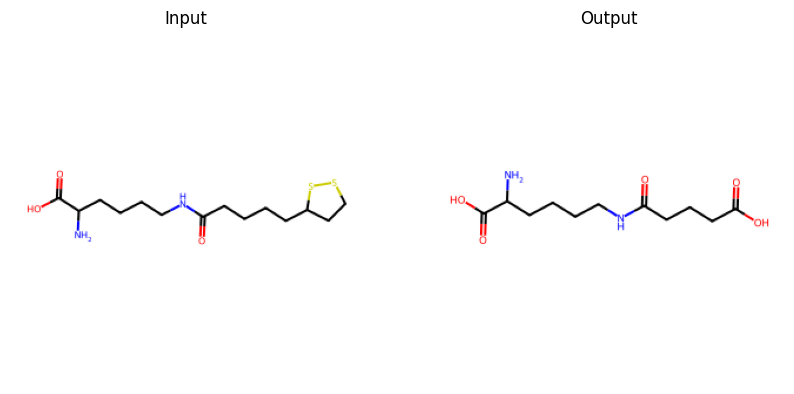

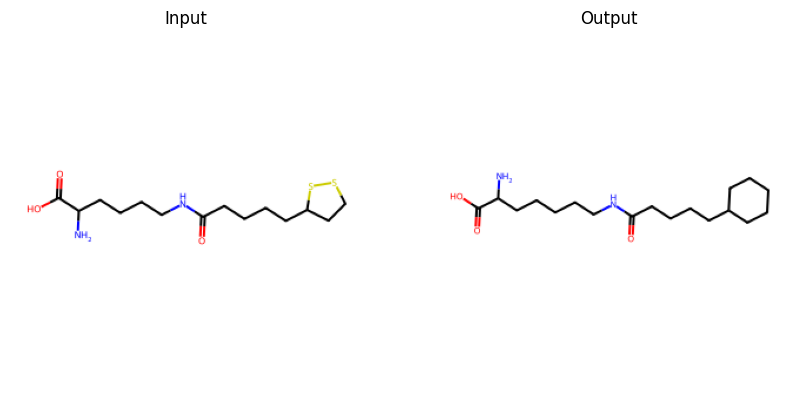

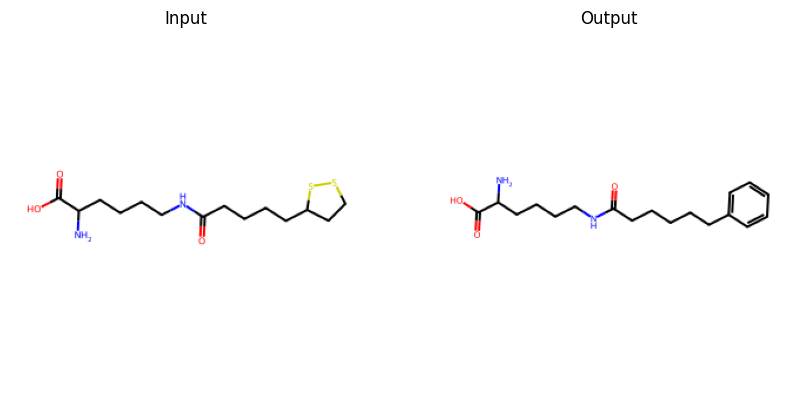

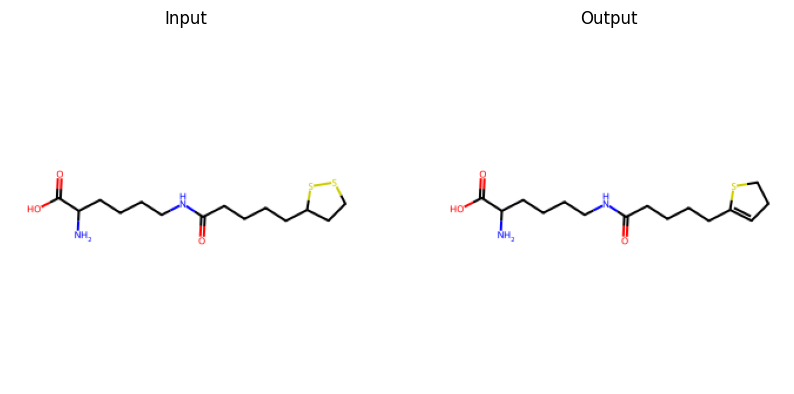

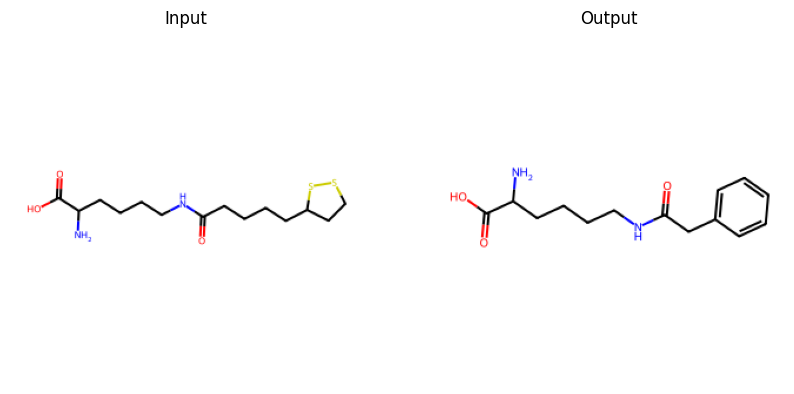

mehp.smi


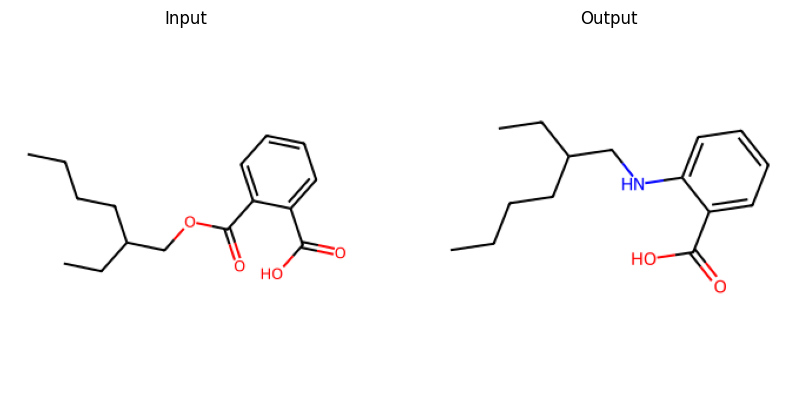

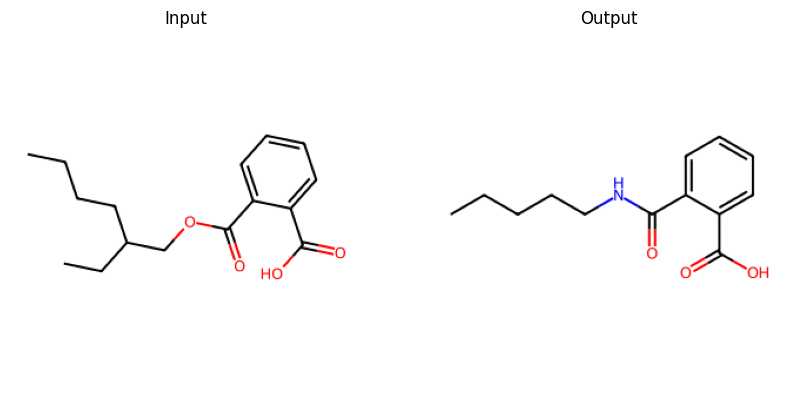

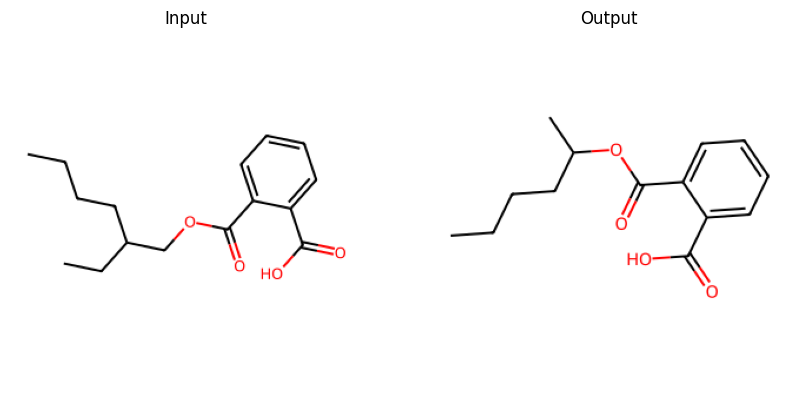

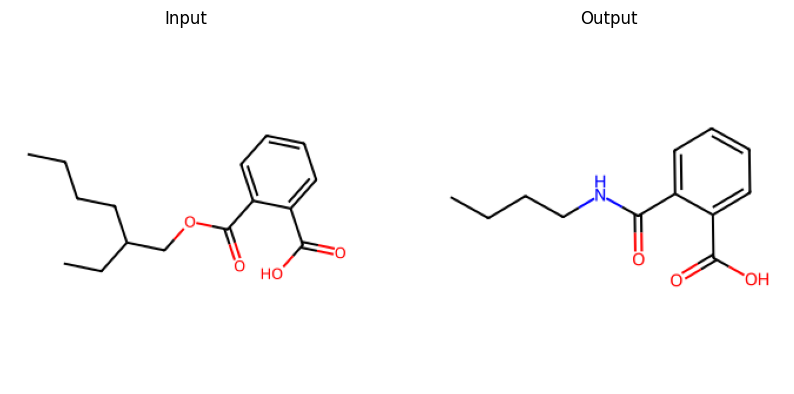

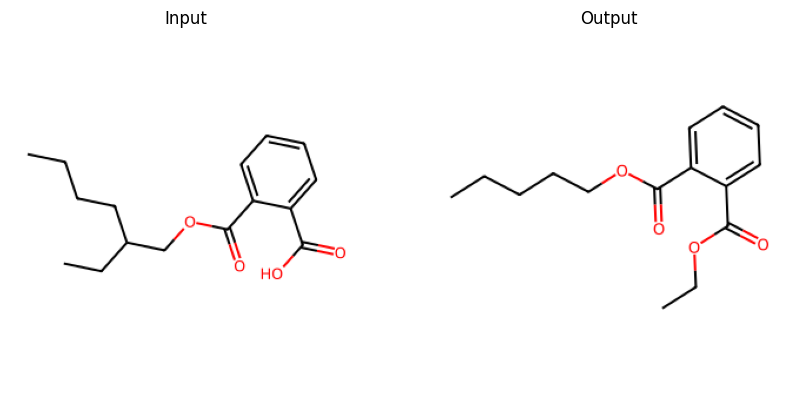

paracetamol.smi


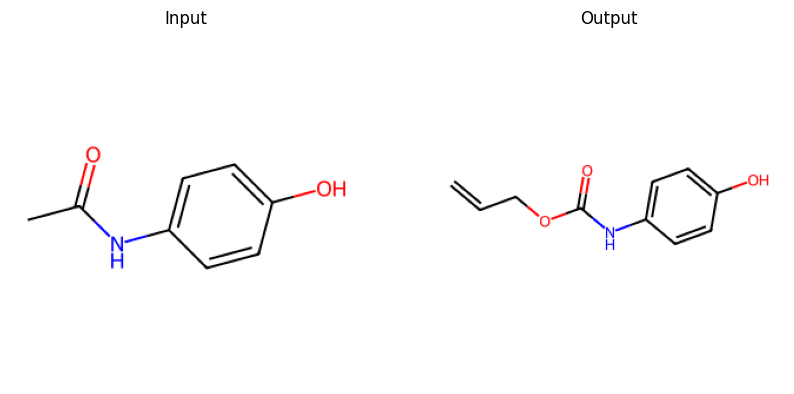

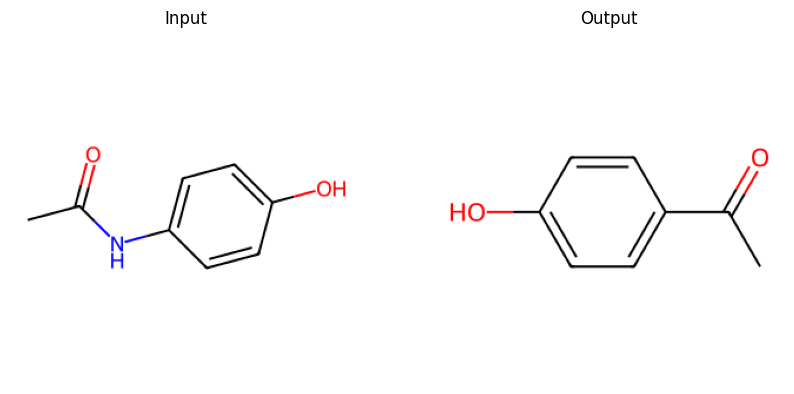

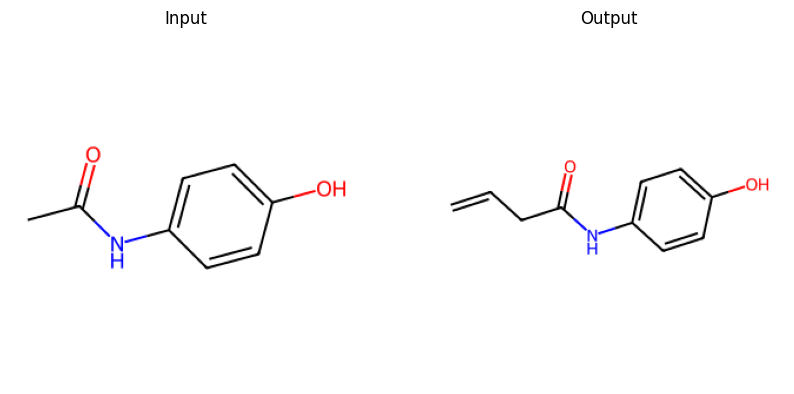

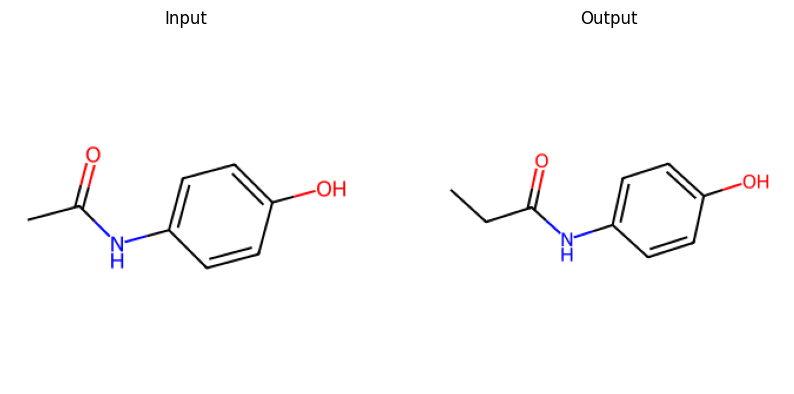

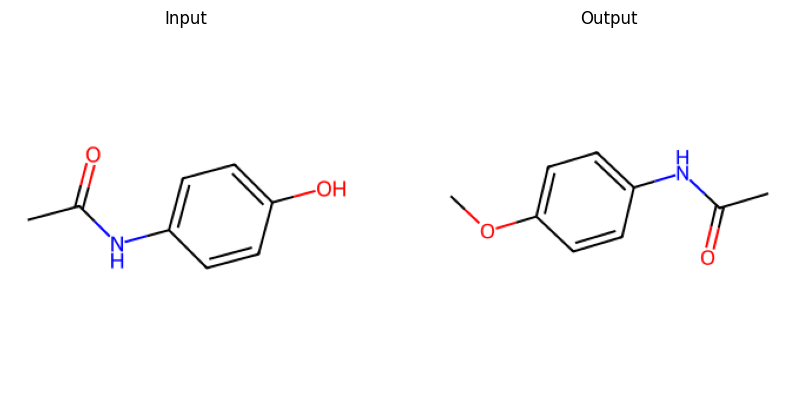

quintozene.smi


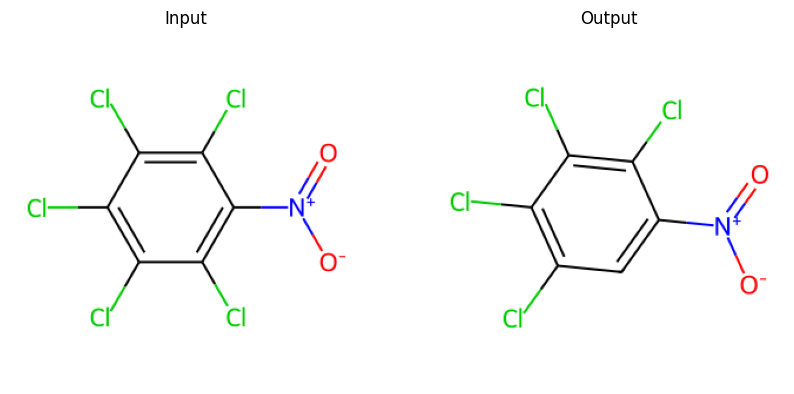

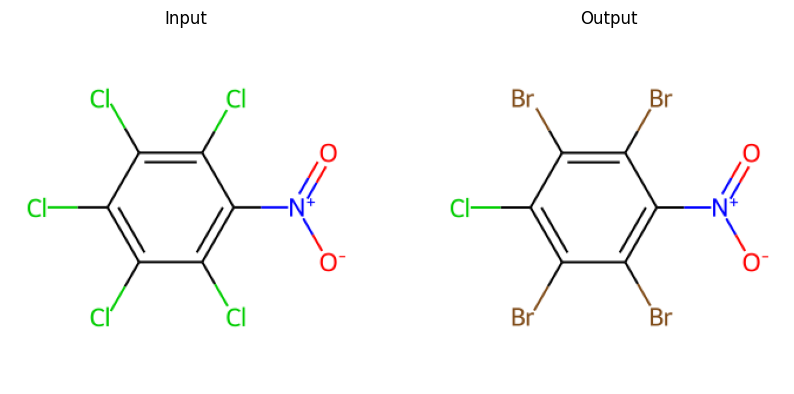

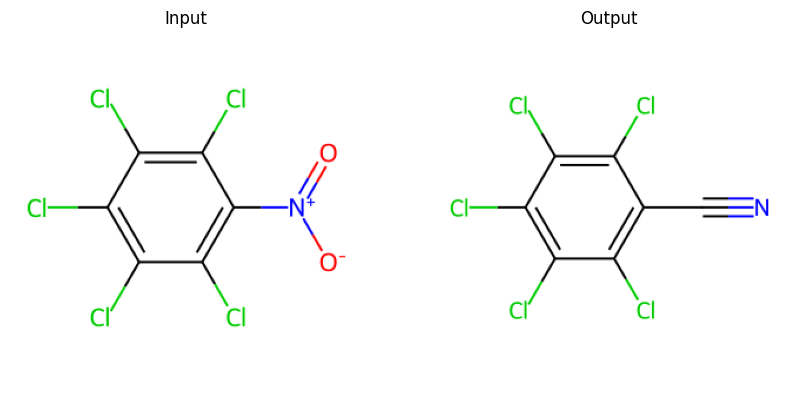

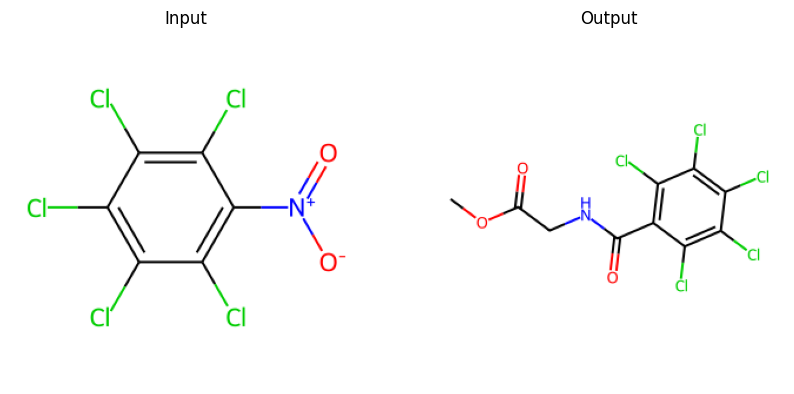

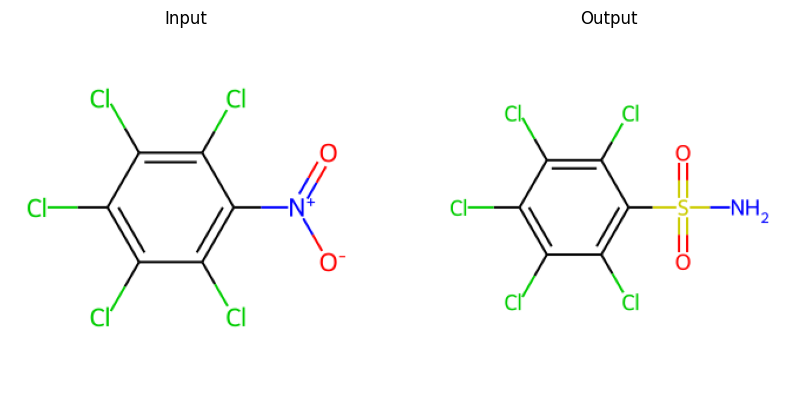

trifluralin.smi


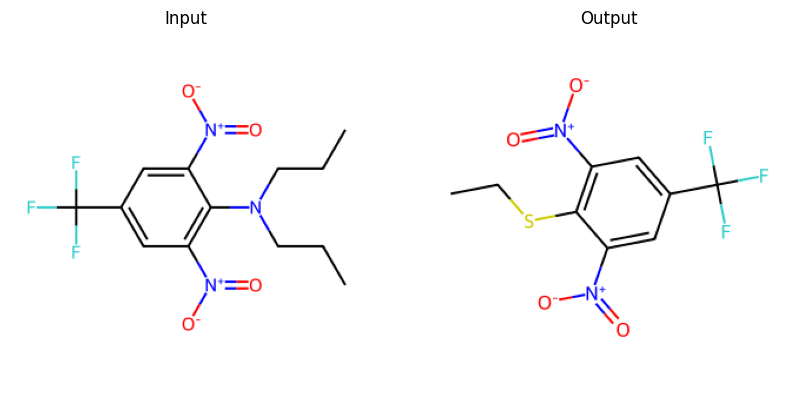

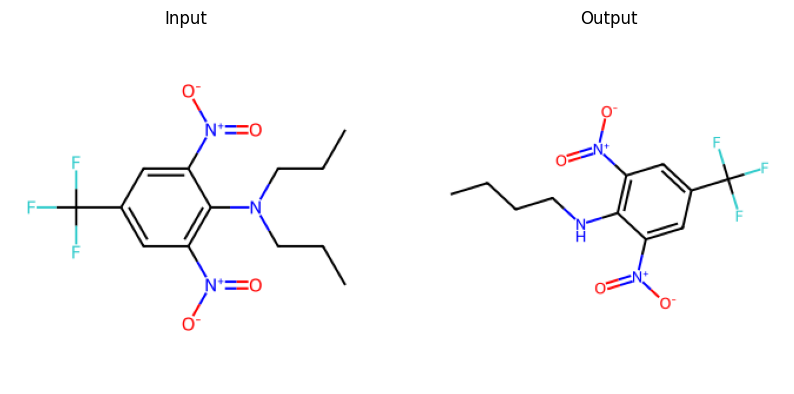

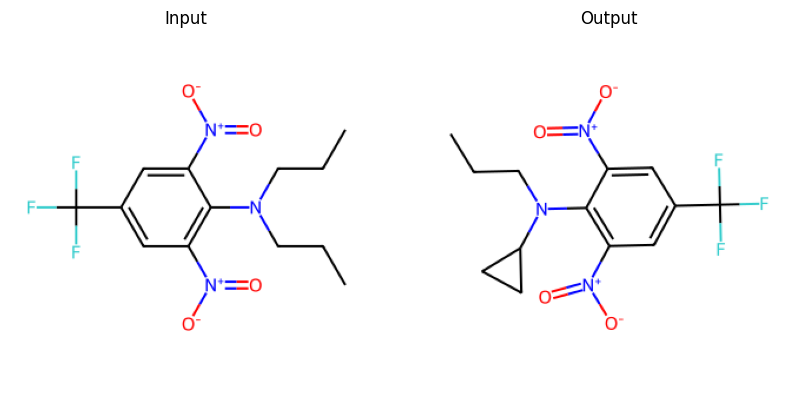

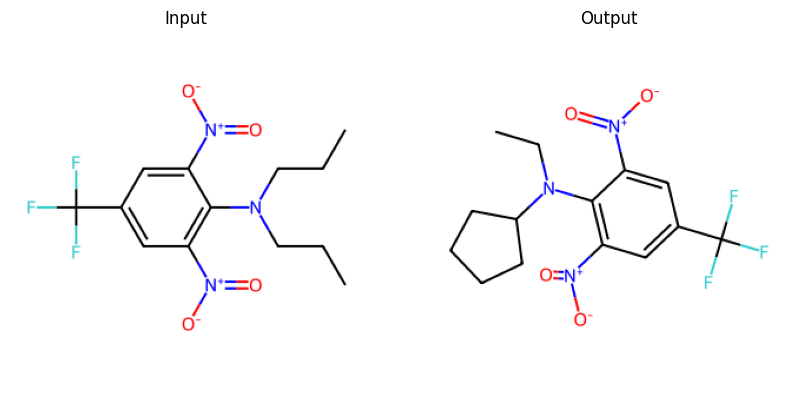

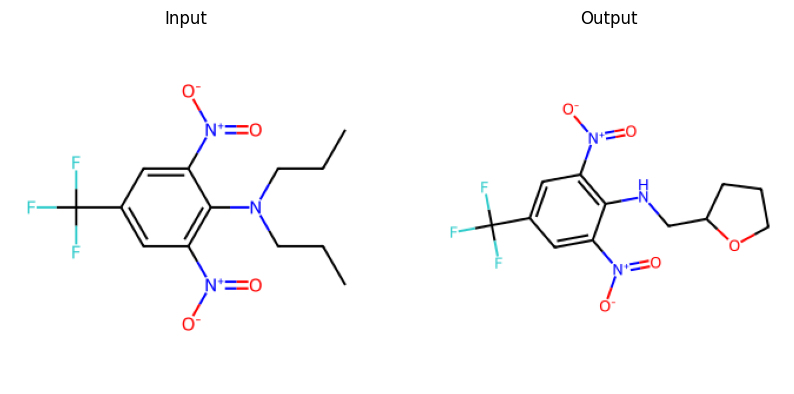

In [4]:
# Visualize molecules
output_files = list(filter(lambda name: name.endswith(".smi"), os.listdir(output_dir)))

for file in output_files:
    file_path = os.path.join(output_dir, file)
    print(file)
    visualize_random_output_molecules(file_path)